### In-class exercise 2
**Date - 2/2/18 **
The aim of this in-class exercise is to warm you up with basic linear regression concept. You have to implement univariate linear regression from scratch using the data set provided.

**Problem Statement:**
Imagine you are the CEO of the chain store and trying to figure out the potential cities to open new stores. Looking at the operating revenue, you noticed that the profits of each chain store seem to have correlation with the city’s population of the store. For this problem, you will need to develop linear regression with one variable to predict profits for a chain store. The data file contains only two columns: the first column is the population of a city and the second column is the profit of a chain store in that city. A negative value for profit indicates a loss. 
*The task is the prediction of profit for the potential cities based their populations.*

In [2]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline 


In [3]:
# Reading data
df = pd.read_csv('eval.txt', names=['population','profit'], header=None)

In [4]:
# display fist few rows of the data set
df.head()

,population,profit
0,0.0,10.0626
1,0.1,38.6784
2,0.2,20.6649
3,0.3,51.9358
4,0.4,41.2496


In [4]:
# adding column names
 # done to make the data more readable

In [5]:
# Looking at statistics of the data
df.describe()

,population,profit
count,100.000000,100.000000
mean,4.950000,59.489807
std,2.901149,21.148097
min,0.000000,10.062600
25%,2.475000,44.259425
50%,4.950000,58.371350
75%,7.425000,77.253375
max,9.900000,104.998000


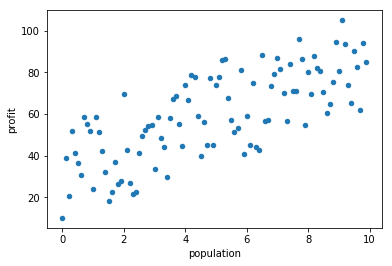

In [6]:
# visualizing the data
df.plot(kind='scatter', x='population', y='profit');
#or
# plot the line into the scatter plot


In [22]:
# Estimate Mean
df.mean()

population     4.950000
profit        59.489807
dtype: float64

In [24]:
# variance
df.var()

population      8.416667
profit        447.241998
dtype: float64

In [26]:
# calculate covariance
df.cov()

,population,profit
population,8.416667,45.009629
profit,45.009629,447.241998


In [7]:
# Estimate co-efficients
b1 = df.cov()['population']['profit']/df['population'].var()
b0 = df['profit'].mean() - b1*df['population'].mean()

In [8]:
print('coefficients: b0=%.3f b1=%.3f' % (b0, b1))

coefficients: b0=33.019 b1=5.348


In [9]:
# Read test data for predictions
df_test = pd.read_csv('test.txt',
                     names=['population','profit'],
                     header=None)
# adding column names
# done to make the data more readable

In [10]:
# printing first five rows
df_test.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [19]:
# actual output
test_data=df_test.values
#print test_data

In [27]:
# predictions by using the formula: y = b0 + b1 * x
prediction=[]
for pt in test_data:
    prediction.append([pt[0],b0+b1*pt[0]])
#print prediction

In [46]:
# Evaluate the performance by computing RMSE
# Calculate root mean squared error


from math import sqrt
def mse_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = float(predicted[i][1]) - float(actual[i][1])
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(actual))
    return mean_error

In [47]:
# compute RMSE
print mse_metric(test_data,prediction)

5279.64724105


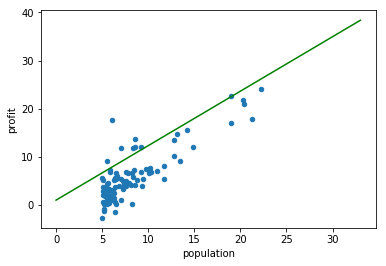

In [57]:
# plot the line into the scatter plot
df_test.plot(kind='scatter', x='population', y='profit').plot([0,b0],[1,b0+b1],c='g')